# Interaction fingerprints

This notebook looks at how interaction fingerprints can be used to filter the results after the conformations were generated by Fragmenstein and minimised.

ODDT will be used to generate the fingerprints between the merge and the protein and the original fragments and the protein. The Tversky similarity can then be calculated and used to see how well the molecules preserve the original interactions with the protein residues.

## Imports

In [1]:
from oddt import toolkit, fingerprints
import pandas as pd
import matplotlib.pyplot as plt

# import scripts
sys.path.insert(1, '/home/sabsr3/xchem/fragment_network_merges/scripts')
from fingerprintFilter import *

## Load the filtered data

Note this just contains information on which merges passed the filter. The files for the placed merges are in the Fragmenstein output folder.

In [2]:
df = pd.read_csv('/home/sabsr3/xchem/fragment_network_merges/data/filtered/fragmensteinFiltered.csv')
df

,Unnamed: 0,Merge,Fragment A ID,Fragment A smiles,Fragment B ID,Fragment B smiles,Synthon,Smiles,Target ID,Target smiles,Fragment A file,Fragment B file,Embedded,Fragment A protein file,Fragment B protein file
0,0,x0107_x0678t,x0107,CC(=O)Nc1cnccc1C,x0678,NC(=O)CC1CCCCC1,[Xe]C1CCCCC1,Cc1ccncc1NC(C)C1CCCCC1,x0678,O=C(CC1CCCCC1)Nc1cccnc1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
1,11,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],COC(Cc1ccccc1)CS(=O)(=O)Nc1ccc(C)cn1,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
2,15,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],CC(=O)N(CCc1ccccc1)CC(=O)Nc1cnccc1C,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
3,17,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],CC1COCCC1NC(=O)Nc1cccnc1,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
4,20,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],CC1CC(NC(=O)Nc2cccnc2)CCO1,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,235,x0107_x2908t,x0107,CC(=O)Nc1cnccc1C,x2908,NC(=O)Nc1cccc(Cl)c1,Cl[Xe],Cc1ccnc(Cl)c1NS(=O)(=O)CCC(=O)O,x2908,Cc1ccncc1NC(=O)Nc1cccc(Cl)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
70,237,x0107_x2908t,x0107,CC(=O)Nc1cnccc1C,x2908,NC(=O)Nc1cccc(Cl)c1,Cl[Xe],Cc1ccnc(Cl)c1NS(=O)(=O)C(C)C(=O)O,x2908,Cc1ccncc1NC(=O)Nc1cccc(Cl)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
71,238,x0107_x2908t,x0107,CC(=O)Nc1cnccc1C,x2908,NC(=O)Nc1cccc(Cl)c1,Cl[Xe],Cc1ccnc(Cl)c1NCC(C)CNC(=O)OC(C)(C)C,x2908,Cc1ccncc1NC(=O)Nc1cccc(Cl)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
72,268,x0678_x1249,x0678,O=C(CC1CCCCC1)Nc1cccnc1,x1249,N#Cc1ccc(CNC(=O)N2CCOCC2)cc1,N#C[Xe],N#Cc1cccnc1SCC(=O)NC1CCCCC1,x2600,N#Cc1cccc(CC(=O)Nc2cccnc2)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...


merge
'/home/sabsr3/xchem/Fragmenstein/output/filtered/MERGE-INDEX/MERGE-INDEX.minimised.mol'

fragment A
'/home/sabsr3/xchem/Fragmenstein/output/filtered/MERGE-INDEX/hit0.mol'

fragment B
'/home/sabsr3/xchem/Fragmenstein/output/filtered/MERGE-INDEX/hit1.mol'

protein
'/home/sabsr3/xchem/Fragmenstein/fragmenstein/mpro/data/template.pdb'

In [3]:
indices = [i for i in df['Unnamed: 0']]
merges = [i for i in df['Merge']]

In [4]:
# paths for the different files (replace MERGE and INDEX with appropriate strings)
merge_path = '/home/sabsr3/xchem/Fragmenstein/output/filtered/MERGE-INDEX/MERGE-INDEX.minimised.mol'

fA_path = '/home/sabsr3/xchem/Fragmenstein/output/filtered/MERGE-INDEX/hit0.mol'

fB_path = '/home/sabsr3/xchem/Fragmenstein/output/filtered/MERGE-INDEX/hit1.mol'

protein_path = '/home/sabsr3/xchem/Fragmenstein/fragmenstein/mpro/data/template.pdb'

In [5]:
protein = next(toolkit.readfile('pdb', protein_path))

merge_fps = []
fA_fps = []
fB_fps = []

fraga_dice = []
fragb_dice = []

means = []

for i, m in zip(indices, merges):
    m = m.replace('_', '-')
    merge = merge_path.replace('MERGE', m).replace('INDEX', str(i))
    fA = fA_path.replace('MERGE', m).replace('INDEX', str(i))
    fB = fB_path.replace('MERGE', m).replace('INDEX', str(i))

    merge_mol = next(toolkit.readfile('mol', merge))
    fA_mol = next(toolkit.readfile('mol', fA))
    fB_mol = next(toolkit.readfile('mol', fB))

    merge_fp = fingerprints.InteractionFingerprint(merge_mol, protein)
    fA_fp = fingerprints.InteractionFingerprint(fA_mol, protein)
    fB_fp = fingerprints.InteractionFingerprint(fB_mol, protein)

    score1 = fingerprints.dice(merge_fp, fA_fp)
    score2 = fingerprints.dice(merge_fp, fB_fp)

    fraga_dice.append(score1)
    fragb_dice.append(score2)

    mean = (score1 + score2) / 2
    means.append(mean)

    merge_fps.append(merge_fp)
    fA_fps.append(fA_fp)
    fB_fps.append(fB_fp)

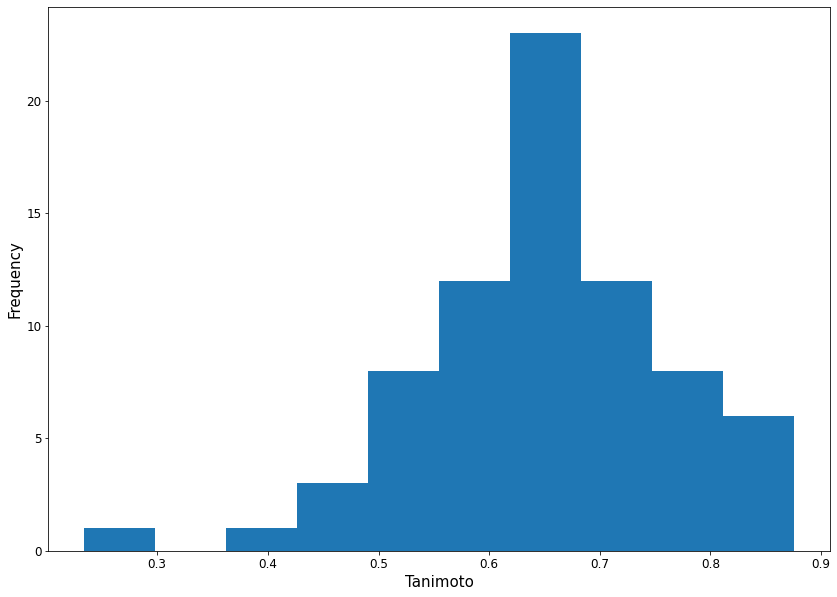

In [6]:
plt.figure(figsize=(14,10))
plt.hist(means)
plt.xlabel('Tanimoto', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [7]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0

for m in means:
    if m > 0.5: count1 += 1
    if m > 0.6: count2 += 1
    if m > 0.7: count3 += 1
    if m > 0.8: count4 += 1

print('No. tanimoto > 0.5:', count1)
print('No. tanimoto > 0.6:', count2)
print('No. tanimoto > 0.7:', count3)
print('No. tanimoto > 0.8:', count4)

No. tanimoto > 0.5: 69
No. tanimoto > 0.6: 49
No. tanimoto > 0.7: 26
No. tanimoto > 0.8: 7


Test script to filter the compounds

In [8]:
indices = [i for i in df['Unnamed: 0']]
merges = [i for i in df['Merge']]

# paths for the different files (replace MERGE and INDEX with appropriate strings)
merge_path = '/home/sabsr3/xchem/Fragmenstein/output/filtered/MERGE-INDEX/MERGE-INDEX.minimised.mol'

fA_path = '/home/sabsr3/xchem/Fragmenstein/output/filtered/MERGE-INDEX/hit0.mol'

fB_path = '/home/sabsr3/xchem/Fragmenstein/output/filtered/MERGE-INDEX/hit1.mol'

protein_path = '/home/sabsr3/xchem/Fragmenstein/fragmenstein/mpro/data/template.pdb'

In [9]:
filtered = []

for i, m in zip(indices, merges):
    m = m.replace('_', '-')
    merge = merge_path.replace('MERGE', m).replace('INDEX', str(i))
    fA = fA_path.replace('MERGE', m).replace('INDEX', str(i))
    fB = fB_path.replace('MERGE', m).replace('INDEX', str(i))
    result = InteractionFPFilter(merge, fA, fB, protein_path).similarity_filter()
    filtered.append(result)

In [14]:
res = [i for i in filtered if i != None]
len(res)

49

In [15]:
def get_indices(fnames):
    indices = []
    for fname in fnames:
        indices.append(fname.split('/')[7].split('-')[2])
    return indices

In [24]:
filtered_indices = get_indices(res)
filtered_indices = [int(i) for i in filtered_indices]

In [33]:
new_df = df[df['Unnamed: 0'].isin(filtered_indices)].reset_index(drop=True)

In [34]:
new_df = new_df.rename(columns={"Unnamed: 0": "Fragmenstein file index"})

In [35]:
new_df

,Fragmenstein file index,Merge,Fragment A ID,Fragment A smiles,Fragment B ID,Fragment B smiles,Synthon,Smiles,Target ID,Target smiles,Fragment A file,Fragment B file,Embedded,Fragment A protein file,Fragment B protein file
0,11,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],COC(Cc1ccccc1)CS(=O)(=O)Nc1ccc(C)cn1,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
1,15,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],CC(=O)N(CCc1ccccc1)CC(=O)Nc1cnccc1C,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
2,17,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],CC1COCCC1NC(=O)Nc1cccnc1,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
3,20,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],CC1CC(NC(=O)Nc2cccnc2)CCO1,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
4,30,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],Cc1cccc(NC(=O)CCNC(=O)COc2ccccc2)n1,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
5,32,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],Cc1cccnc1CN(C)Cc1ccccc1,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
6,37,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],Cc1cccnc1CN(Cc1ccccc1)C(C)CBr,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
7,40,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],Cc1cnccc1CN(CC(=O)O)Cc1ccccc1,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
8,47,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],Cc1cccnc1CNCC(C)(C)N(C)Cc1ccccc1,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
9,48,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],Cc1ncccc1NC(=O)C(N)c1ccccc1,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragmen

In [36]:
new_df.to_csv('/home/sabsr3/xchem/fragment_network_merges/data/filtered/interactionFPFiltered.csv', index=False)